In [55]:
from functools import reduce

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
# preds_path_ls = [
#     ('raw 0 shot',   r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\Raw_0sh.bin'),
#     ('raw 5 shot',   r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\Raw_5sh.bin'),
#     ('LoRA 0 shot',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\LoRA-cfg17_0sh.bin'),
#     ('LoRA 5 shot',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\LoRA-cfg17_5sh.bin'),
#     ('GSOFT_2 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg2_0sh.bin'),
#     ('GSOFT_2 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg2_5sh.bin'),
#     ('GSOFT_3 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg3_0sh.bin'),
#     ('GSOFT_3 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg3_5sh.bin'),
#     ('GSOFT_4 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg4_0sh.bin'),
#     ('GSOFT_4 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg4_5sh.bin'),
#     ('GSOFT_5 0 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg5_0sh.bin'),
#     ('GSOFT_5 5 shot', r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg5_5sh.bin'),
# ]

In [20]:
preds_path_ls = [
    ('LoRA EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\LoRA-cfg17_0sh.bin'),
    ('Raw EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\Raw_0sh.bin'),
    ('GSOFT-3 EN_US',  r'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\test_preds\GSOFT-cfg3_0sh.bin'),
]

langs = ('AR_XY', 'BN_BD', 'DE_DE', 'ES_LA', 'FR_FR', 'HI_IN', 'ID_ID', 'IT_IT', 'JA_JP', 'KO_KR', 'PT_BR')

preds_path_ls += [
    (f'LoRA {lang}', rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\LoRA-cfg17\{lang}.bin')
    for lang in langs
]

preds_path_ls += [
    (f'Raw {lang}', rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\Raw\{lang}.bin')
    for lang in langs
]

preds_path_ls += [
    (f'GSOFT-3 {lang}', rf'C:\Users\Vladimir\PycharmProjects\OrthogonalFineTune\MMMLU\GSOFT-cfg3\{lang}.bin')
    for lang in langs
]

In [21]:
preds_dfs = {}

for run_name, preds_path in preds_path_ls:
    with open(preds_path, 'rb') as f:
        preds_dfs[run_name] = pickle.load(file=f)

        print(f"{run_name:16}: {preds_dfs[run_name].shape=}")

LoRA EN_US      : preds_dfs[run_name].shape=(14042, 6)
Raw EN_US       : preds_dfs[run_name].shape=(14042, 6)
GSOFT-3 EN_US   : preds_dfs[run_name].shape=(14042, 6)
LoRA AR_XY      : preds_dfs[run_name].shape=(14042, 6)
LoRA BN_BD      : preds_dfs[run_name].shape=(14042, 6)
LoRA DE_DE      : preds_dfs[run_name].shape=(14042, 6)
LoRA ES_LA      : preds_dfs[run_name].shape=(14042, 6)
LoRA FR_FR      : preds_dfs[run_name].shape=(14042, 6)
LoRA HI_IN      : preds_dfs[run_name].shape=(14042, 6)
LoRA ID_ID      : preds_dfs[run_name].shape=(14042, 6)
LoRA IT_IT      : preds_dfs[run_name].shape=(14042, 6)
LoRA JA_JP      : preds_dfs[run_name].shape=(14042, 6)
LoRA KO_KR      : preds_dfs[run_name].shape=(14042, 6)
LoRA PT_BR      : preds_dfs[run_name].shape=(14042, 6)
Raw AR_XY       : preds_dfs[run_name].shape=(14042, 6)
Raw BN_BD       : preds_dfs[run_name].shape=(14042, 6)
Raw DE_DE       : preds_dfs[run_name].shape=(14042, 6)
Raw ES_LA       : preds_dfs[run_name].shape=(14042, 6)
Raw FR_FR 

In [22]:
next(iter(preds_dfs.values())).head()

,generated_text,subject,pred,true,corr,category
0,D. 6,abstract_algebra,D,B,0,STEM
1,D. 120,abstract_algebra,D,C,0,STEM
2,The given polynomial is,abstract_algebra,I,D,0,STEM
3,"A. True,",abstract_algebra,A,B,0,STEM
4,B. 6,abstract_algebra,B,B,1,STEM


In [23]:
acc_by_subjects = pd.DataFrame({
    'subject': list(set.union(
        *map(
            lambda df: set(df['subject']),
            preds_dfs.values()
        )
    ))
})

print(f"Subjects: {acc_by_subjects['subject']}")

for run_name, preds_df in preds_dfs.items():
    acc_df = preds_df[['subject', 'corr']].groupby(['subject'], as_index=False).mean()
    acc_df.rename(columns={'corr': run_name}, inplace=True)

    acc_by_subjects = acc_by_subjects.merge(
        acc_df,
        left_on='subject',
        right_on='subject',
        how='right'
    )

Subjects: 0                   professional_medicine
1                               marketing
2                       international_law
3                       computer_security
4                              management
5                         college_biology
6                         business_ethics
7            high_school_european_history
8                          moral_disputes
9                        machine_learning
10                           global_facts
11                 high_school_us_history
12                        world_religions
13                    college_mathematics
14                      us_foreign_policy
15                        moral_scenarios
16                  high_school_chemistry
17                 elementary_mathematics
18                             philosophy
19                       abstract_algebra
20                  high_school_geography
21                       security_studies
22                      logical_fallacies
23                      

In [24]:
acc_by_subjects

,subject,LoRA EN_US,Raw EN_US,GSOFT-3 EN_US,LoRA AR_XY,LoRA BN_BD,LoRA DE_DE,LoRA ES_LA,LoRA FR_FR,LoRA HI_IN,...,GSOFT-3 BN_BD,GSOFT-3 DE_DE,GSOFT-3 ES_LA,GSOFT-3 FR_FR,GSOFT-3 HI_IN,GSOFT-3 ID_ID,GSOFT-3 IT_IT,GSOFT-3 JA_JP,GSOFT-3 KO_KR,GSOFT-3 PT_BR
0,abstract_algebra,0.310000,0.350000,0.240000,0.340000,0.390000,0.330000,0.310000,0.320000,0.340000,...,0.370000,0.340000,0.310000,0.340000,0.320000,0.330000,0.350000,0.320000,0.290000,0.270000
1,anatomy,0.629630,0.674074,0.666667,0.377778,0.392593,0.496296,0.518519,0.496296,0.362963,...,0.340741,0.540741,0.540741,0.525926,0.400000,0.488889,0.518519,0.481481,0.392593,0.518519
2,astronomy,0.717105,0.750000,0.743421,0.473684,0.453947,0.592105,0.638158,0.671053,0.480263,...,0.434211,0.625000,0.644737,0.684211,0.519737,0.592105,0.638158,0.625000,0.513158,0.657895
3,business_ethics,0.610000,0.660000,0.710000,0.580000,0.430000,0.610000,0.670000,0.540000,0.480000,...,0.500000,0.590000,0.680000,0.580000,0.510000,0.580000,0.680000,0.610000,0.620000,0.640000
4,clinical_knowledge,0.743396,0.716981,0.762264,0.498113,0.464151,0.588679,0.637736,0.633962,0.494340,...,0.449057,0.577358,0.596226,0.618868,0.509434,0.581132,0.622642,0.539623,0.467925,0.630189
5,college_biology,0.784722,0.715278,0.756944,0.493056,0.368056,0.583333,0.562500,0.597222,0.368056,...,0.312500,0.611111,0.618056,0.569444,0.409722,0.597222,0.520833,0.430556,0.375000,0.562500
6,college_chemistry,0.480000,0.450000,0.450000,0.320000,0.350000,0.450000,0.420000,0.440000,0.390000,...,0.370000,0.390000,0.450000,0.420000,0.360000,0.480000,0.410000,0.390000,0.380000,0.440000
7,college_computer_science,0.470000,0.470000,0.460000,0.430000,0.320000,0.460000,0.460000,0.400000,0.360000,...,0.330000,0.470000,0.480000,0.430000,0.330000,0.440000,0.460000,0.370000,0.460000,0.440000
8,college_mathematics,0.280000,0.350000,0.240000,0.320000,0.230000,0.300000,0.300000,0.410000,0.280000,...,0.270000,0.340000,0.350000,0.340000,0.320000,0.280000,0.370000,0.390000,0.310000,0.380000
9,college_medicine,0.664740,0.618497,0.647399,0.416185,0.387283,0.554913,0.514451,0.578035,0.416185,...,0.369942,0.554913,0.526012,0.595376,0.404624,0.514451,0.549133,0.468208,0.416185,0.543353


In [43]:
acc_by_categories = pd.DataFrame({
    'category': list(set.union(
        *map(
            lambda df: set(df['category']),
            preds_dfs.values()
        )
    ))
})

for run_name, preds_df in preds_dfs.items():
    acc_df = preds_df[['category', 'corr']].groupby(['category'], as_index=False).mean()
    acc_df.rename(columns={'corr': run_name}, inplace=True)

    acc_by_categories = acc_by_categories.merge(
        acc_df,
        left_on='category',
        right_on='category',
        how='right'
    )

acc_by_categories.set_index('category', inplace=True)

In [61]:
acc_by_categories.filter(regex="Raw*", axis=1)

,Raw EN_US,Raw AR_XY,Raw BN_BD,Raw DE_DE,Raw ES_LA,Raw FR_FR,Raw HI_IN,Raw ID_ID,Raw IT_IT,Raw JA_JP,Raw KO_KR,Raw PT_BR
category,,,,,,,,,,,,
STEM,0.525182,0.363486,0.345262,0.449967,0.450298,0.449304,0.379390,0.427767,0.451624,0.426110,0.389662,0.457588
humanities,0.527099,0.380659,0.331987,0.451860,0.477152,0.471626,0.361105,0.406164,0.460149,0.397024,0.401488,0.465675
"other (business, health, misc.)",0.706663,0.462060,0.389574,0.592844,0.609500,0.603640,0.445713,0.558297,0.579272,0.505244,0.476249,0.596237
social sciences,0.721807,0.456939,0.382515,0.587260,0.610335,0.600260,0.451414,0.537862,0.588235,0.506337,0.505037,0.604810


In [63]:
acc_by_categories.filter(regex="LoRA*", axis=1)

,LoRA EN_US,LoRA AR_XY,LoRA BN_BD,LoRA DE_DE,LoRA ES_LA,LoRA FR_FR,LoRA HI_IN,LoRA ID_ID,LoRA IT_IT,LoRA JA_JP,LoRA KO_KR,LoRA PT_BR
category,,,,,,,,,,,,
STEM,0.540755,0.405235,0.360835,0.467860,0.482770,0.487740,0.396620,0.457919,0.476474,0.446322,0.426441,0.490391
humanities,0.556217,0.427843,0.366844,0.491180,0.516259,0.512859,0.414028,0.453985,0.505845,0.443571,0.450797,0.497768
"other (business, health, misc.)",0.709130,0.494448,0.425972,0.595003,0.620913,0.619679,0.467304,0.563849,0.603331,0.530228,0.504935,0.611351
social sciences,0.746831,0.505037,0.410790,0.616185,0.644134,0.625609,0.479688,0.572636,0.623984,0.535587,0.536887,0.641209


In [62]:
acc_by_categories.filter(regex="GSOFT-3*", axis=1)

,GSOFT-3 EN_US,GSOFT-3 AR_XY,GSOFT-3 BN_BD,GSOFT-3 DE_DE,GSOFT-3 ES_LA,GSOFT-3 FR_FR,GSOFT-3 HI_IN,GSOFT-3 ID_ID,GSOFT-3 IT_IT,GSOFT-3 JA_JP,GSOFT-3 KO_KR,GSOFT-3 PT_BR
category,,,,,,,,,,,,
STEM,0.516567,0.400928,0.363154,0.469185,0.480782,0.474486,0.406561,0.457256,0.479457,0.446985,0.424122,0.477800
humanities,0.557705,0.428693,0.357705,0.487566,0.518597,0.516684,0.405101,0.456323,0.497131,0.448459,0.441870,0.494155
"other (business, health, misc.)",0.724553,0.513880,0.421653,0.608883,0.626157,0.623689,0.483652,0.579889,0.602714,0.535472,0.505244,0.620913
social sciences,0.757556,0.516737,0.405915,0.626909,0.650959,0.640234,0.482613,0.574261,0.630159,0.535912,0.541111,0.647384


In [68]:
def get_advantage(results_df, name):
    baseline = results_df.filter(regex="Raw*", axis=1)
    baseline = baseline.rename(lambda s: s.replace('Raw', '').strip(), axis=1)

    target_df = results_df.filter(regex=f"{name}*", axis=1)
    target_df = target_df.rename(lambda s: s.replace(name, '').strip(), axis=1)

    return target_df - baseline

In [110]:
run_names = ('LoRA', 'GSOFT-3')
advantage_dfs = []

for run_name in run_names:
    advantage_df = pd.melt(
        frame=get_advantage(acc_by_categories, name=run_name).reset_index(),
        id_vars='category',
        var_name='language',
        value_name='advantage'
    )
    advantage_df.loc[:, 'run'] = run_name

    advantage_dfs.append(advantage_df)

advantage_by_categories = pd.concat(advantage_dfs, axis=0, ignore_index=True)

print(f"Shape: {advantage_by_categories.shape}")

advantage_by_categories['category'] = advantage_by_categories['category'].apply(lambda s: s.replace('other (business, health, misc.)', 'other'))

advantage_by_categories.head()

Shape: (96, 4)


,category,language,advantage,run
0,STEM,EN_US,0.015573,LoRA
1,humanities,EN_US,0.029118,LoRA
2,other,EN_US,0.002468,LoRA
3,social sciences,EN_US,0.025024,LoRA
4,STEM,AR_XY,0.041750,LoRA


<Axes: xlabel='category', ylabel='advantage'>

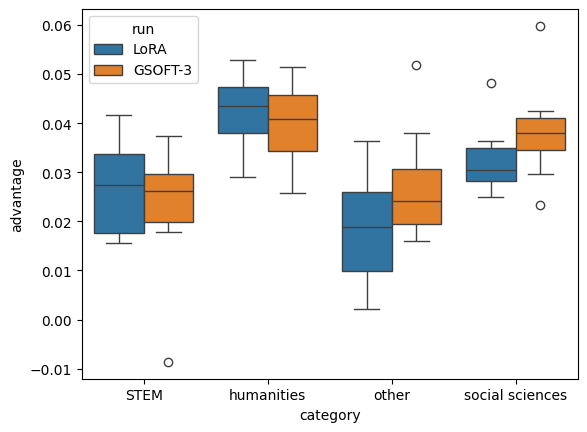

In [111]:
sns.boxplot(
    data=advantage_by_categories,
    y='advantage',
    x='category',
    hue='run'
)

<Axes: ylabel='advantage'>

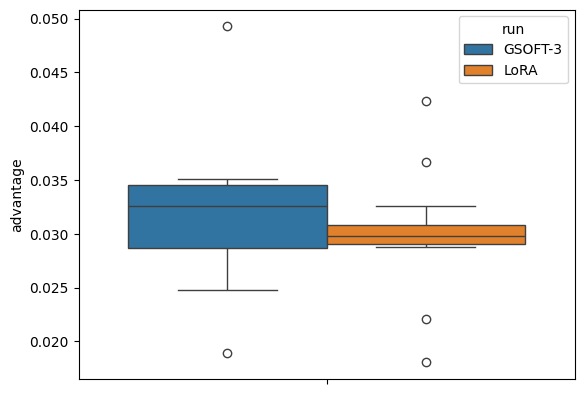

In [131]:
# correct iff categories have same balance

total_advantage = advantage_by_categories.groupby(['language', 'run'], as_index=False)['advantage'].mean()

sns.boxplot(
    data=total_advantage,
    y='advantage',
    hue='run'
)

In [112]:
total_res = pd.DataFrame(columns=['run_name', 'accuracy', 'correctness'])

for run_name, preds_df in preds_dfs.items():
    total_accuracy = preds_df['corr'].mean()
    total_correctness = (preds_df['pred'] != 'I').mean()

    total_res = pd.concat([
        total_res,
        pd.DataFrame({
            'run_name': [run_name],
            'accuracy': [total_accuracy],
            'correctness': [total_correctness],
        })
    ])

C:\Users\Vladimir\AppData\Local\Temp\ipykernel_22056\2066953499.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_res = pd.concat([


In [113]:
total_res

,run_name,accuracy,correctness
0,LoRA EN_US,0.629967,0.992024
0,Raw EN_US,0.610810,0.997151
0,GSOFT-3 EN_US,0.631178,0.984902
0,LoRA AR_XY,0.455277,0.999786
0,LoRA BN_BD,0.388833,0.999929
0,LoRA DE_DE,0.537530,0.999501
0,LoRA ES_LA,0.561245,0.999003
0,LoRA FR_FR,0.556830,0.999003
0,LoRA HI_IN,0.436975,0.999786
0,LoRA ID_ID,0.506196,1.000000
